In [1]:
import pandas as pd
import numpy as np
import os
import os.path as op
import copy

In [2]:
path = '../../data/kaggle-houseprice'
for dirname, _, filenames in os.walk(path):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
setNames = ['train.csv','test.csv']
data = []
for sn in setNames:
    data.append( pd.read_csv(op.join(path,sn)))

../../data/kaggle-houseprice/train_RobustScaledClean
../../data/kaggle-houseprice/test_RobustScaledClean
../../data/kaggle-houseprice/test_MinMaxScaledCleanedOutlier
../../data/kaggle-houseprice/train_label
../../data/kaggle-houseprice/train_MinMaxScaledClean
../../data/kaggle-houseprice/train_MinMaxScaleCleanedOutlier
../../data/kaggle-houseprice/test.csv
../../data/kaggle-houseprice/test_MinMaxScaledClean
../../data/kaggle-houseprice/data_description.txt
../../data/kaggle-houseprice/train.csv


In [3]:
data[0].head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
data2 = []
corruptedFeatures = []
correctFeatures = []
size = [len(d['Id']) for d in data]

for i, d in enumerate(data):
    fs = d.dropna(axis=1, thresh=int(size[i]*0.5)).columns
    fixerUpper = d.drop(fs, axis=1).columns
    correct = d.dropna(axis=1).columns

    corruptedFeatures.append(fixerUpper)
    correctFeatures.append(correct)
    data2.append(pd.DataFrame(d[fs]))
    data2[-1].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 77 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [5]:
data3 = []
correctableFeatures = []
for i, d in enumerate(data2):

    fs = d.dropna(axis=1).columns
    df = d.drop(fs, axis=1)
    df.info()
    data3.append(pd.DataFrame(df))
    correctableFeatures.append(df.columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   LotFrontage   1201 non-null   float64
 1   MasVnrType    1452 non-null   object 
 2   MasVnrArea    1452 non-null   float64
 3   BsmtQual      1423 non-null   object 
 4   BsmtCond      1423 non-null   object 
 5   BsmtExposure  1422 non-null   object 
 6   BsmtFinType1  1423 non-null   object 
 7   BsmtFinType2  1422 non-null   object 
 8   Electrical    1459 non-null   object 
 9   FireplaceQu   770 non-null    object 
 10  GarageType    1379 non-null   object 
 11  GarageYrBlt   1379 non-null   float64
 12  GarageFinish  1379 non-null   object 
 13  GarageQual    1379 non-null   object 
 14  GarageCond    1379 non-null   object 
dtypes: float64(3), object(12)
memory usage: 171.2+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 29 columns):


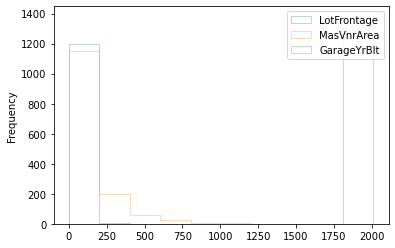

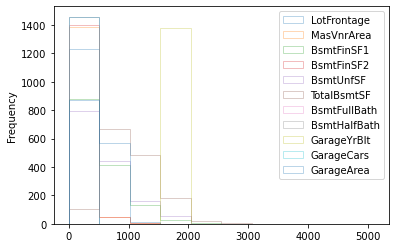

In [6]:
for i, d in enumerate(data3):
    d.plot.hist(alpha=0.3,histtype='step')
#     for col in d.columns:
#         ks = d[col].unique()
#         print(ks)

In [7]:
import random as rd

keyLength = []
#relabel categorial data to numerical
for i, d in enumerate(data2):
 
    for col in correctFeatures[i]:
       
        series = d[col]
        if series.dtype == 'object':
            ks = series.dropna(axis=0).unique()
            keys = {k: i for i, k in enumerate(ks)}
            data2[i][col] = series.map(keys)
            keyLength.append(len(keys.keys()))
            

#clean missing values
for i, d in enumerate(data3):
    for col in d.columns:
        
        series = d[col]
        
        if series.dtype == 'object':
            
            ks = series.dropna(axis=0).unique()
            keys = {k: i for i, k in enumerate(ks)}
            series = series.map(keys)
            keyLength.append(len(keys.keys()))

            kslice = series.copy()
            ids = np.isnan(kslice)
            seq = kslice[~ids].values
            
            ls = len(kslice.loc[ids])
            kslice.loc[ids] = rd.choices(seq, k=ls)
            data2[i][col] = kslice
            
        else:
            kslice = series.copy()
            ids = np.isnan(kslice)
            seq = series[~ids].values
            ls = len(kslice.loc[ids])

            kslice[ids]= rd.choices(seq, k=ls)
            data2[i][col] = kslice

In [8]:
for i, d in enumerate(data2):
    d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 77 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   int64  
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   int64  
 6   LotShape       1460 non-null   int64  
 7   LandContour    1460 non-null   int64  
 8   Utilities      1460 non-null   int64  
 9   LotConfig      1460 non-null   int64  
 10  LandSlope      1460 non-null   int64  
 11  Neighborhood   1460 non-null   int64  
 12  Condition1     1460 non-null   int64  
 13  Condition2     1460 non-null   int64  
 14  BldgType       1460 non-null   int64  
 15  HouseStyle     1460 non-null   int64  
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

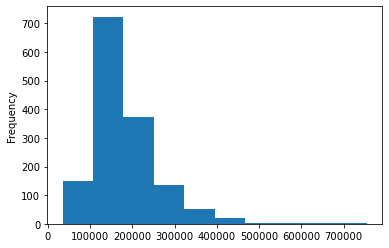

In [9]:
y = data2[0]['SalePrice']
y.plot.hist()
y.to_csv(op.join(path,'train_label'))

In [10]:
X = data2[0].drop(['SalePrice','Id'], axis =1)
X.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,0,65.0,8450,0,0,0,0,0,0,...,61,0,0,0,0,0,2,2008,0,0
1,20,0,80.0,9600,0,0,0,0,1,0,...,0,0,0,0,0,0,5,2007,0,0
2,60,0,68.0,11250,0,1,0,0,0,0,...,42,0,0,0,0,0,9,2008,0,0
3,70,0,60.0,9550,0,1,0,0,2,0,...,35,272,0,0,0,0,2,2006,0,1
4,60,0,84.0,14260,0,1,0,0,1,0,...,84,0,0,0,0,0,12,2008,0,0


<AxesSubplot:>

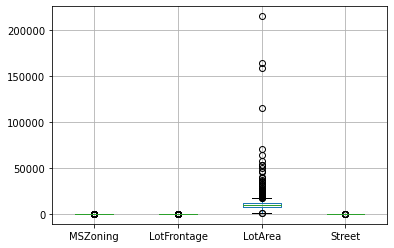

In [11]:
col = list(X.columns)
X.boxplot(col[1:5])

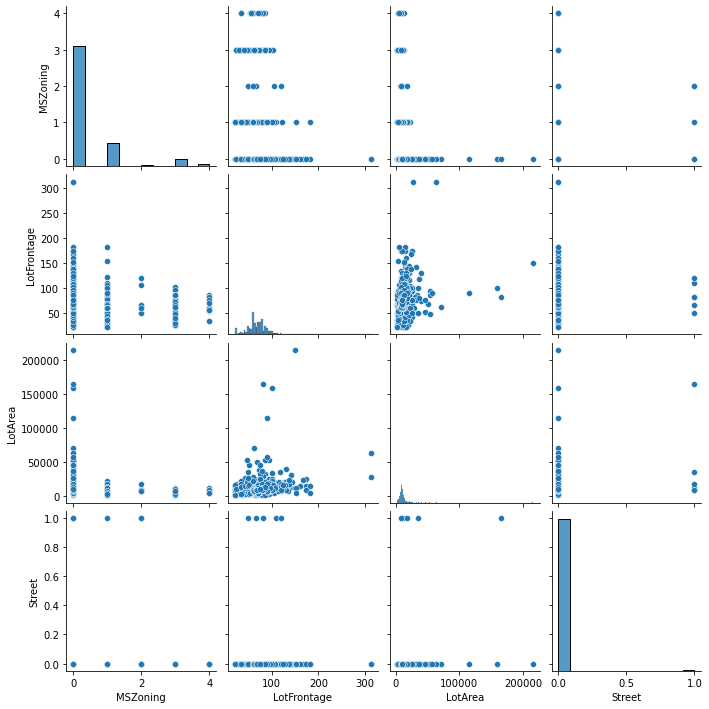

In [12]:
import seaborn as sns
sns.pairplot(X[X.columns[1:5]])

In [13]:
# rescale and export
from sklearn.preprocessing import MinMaxScaler
name = ['train_MinMaxScaledClean','test_MinMaxScaledClean']
for i, d in enumerate(data2):
    try:
        X = d.drop(['SalePrice','Id'], axis =1)
    except:
        X = d.drop('Id', axis =1)
    scaler = MinMaxScaler()
    scaler.fit(X.to_numpy())
    df = scaler.transform(X.to_numpy())
    df = pd.DataFrame(df, columns = list(X.columns))
    
    df.to_csv(op.join(path,name[i]))

Max object key length: 25
LotFrontage
Outliers: 15
...Log-application not possible for ROI
...Winsorize column
[174.0, 174.0, 150.0, 144.0, 174.0, 149.0, 313.0, 168.0, 182.0, 160.0, 152.0, 313.0, 153.0, 174.0, 182.0]


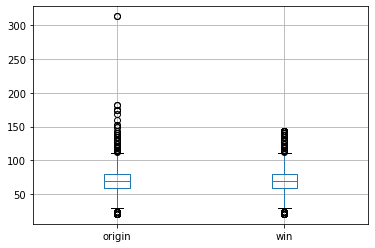

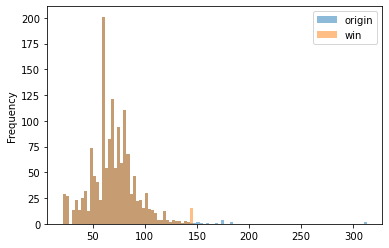

###
LotArea
Outliers: 34
...Log-application not possible for ROI
...Winsorize column
[50271, 31770, 25419, 159000, 39104, 215245, 164660, 53107, 34650, 70761, 53227, 40094, 32668, 25095, 46589, 26178, 115149, 53504, 28698, 45600, 25286, 27650, 24090, 25000, 29959, 35760, 35133, 32463, 24682, 36500, 63887, 25339, 57200, 26142]


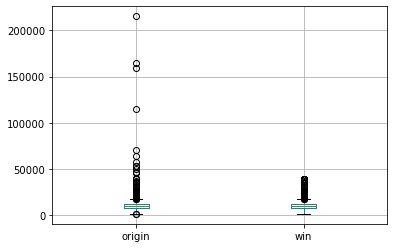

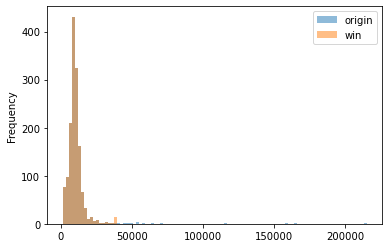

###
MasVnrArea
Outliers: 28
...Log-application not possible for ROI
...Winsorize column
[1031.0, 1115.0, 768.0, 1129.0, 664.0, 748.0, 922.0, 1600.0, 870.0, 772.0, 921.0, 762.0, 660.0, 1170.0, 894.0, 673.0, 860.0, 1047.0, 816.0, 760.0, 975.0, 660.0, 1378.0, 766.0, 788.0, 796.0, 705.0, 731.0]


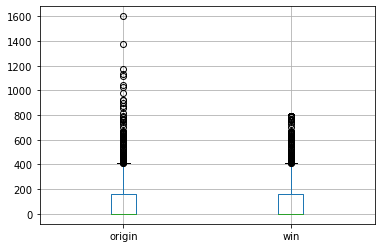

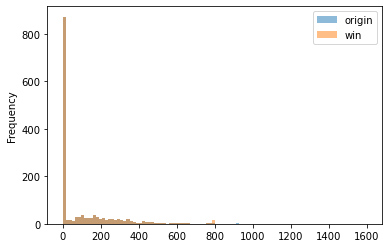

###
BsmtFinSF1
Outliers: 1
...Log-application not possible for ROI
...Winsorize column
[5644]


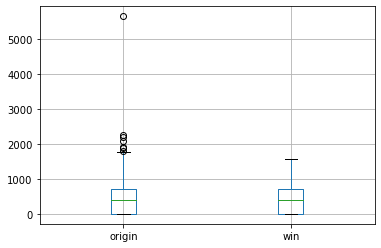

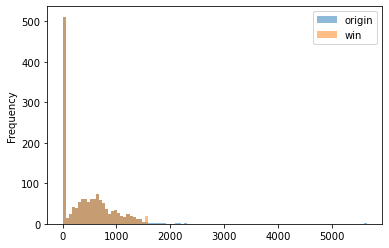

###
BsmtFinSF2
Outliers: 167
...Log-application not possible for ROI
...Winsorize column
[32, 668, 486, 93, 491, 506, 712, 362, 41, 169, 869, 150, 670, 28, 1080, 181, 768, 215, 374, 208, 441, 184, 279, 306, 180, 712, 580, 690, 692, 228, 125, 1063, 620, 175, 820, 1474, 264, 479, 147, 232, 380, 544, 294, 258, 121, 180, 391, 531, 344, 539, 713, 210, 311, 1120, 165, 532, 279, 96, 495, 180, 174, 1127, 139, 202, 645, 123, 551, 219, 606, 147, 612, 480, 182, 132, 336, 468, 287, 35, 499, 180, 180, 723, 119, 182, 40, 551, 117, 239, 80, 472, 64, 1057, 127, 630, 480, 128, 377, 764, 345, 539, 1085, 435, 823, 500, 290, 324, 634, 411, 841, 1061, 93, 466, 396, 354, 294, 149, 193, 117, 273, 465, 400, 468, 41, 682, 64, 557, 230, 106, 791, 240, 287, 547, 391, 469, 177, 108, 374, 600, 492, 211, 168, 96, 1031, 438, 375, 144, 81, 906, 608, 276, 661, 68, 173, 972, 105, 420, 469, 546, 334, 352, 872, 374, 110, 627, 163, 1029, 290]


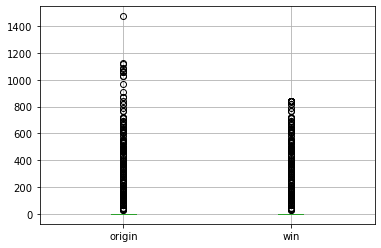

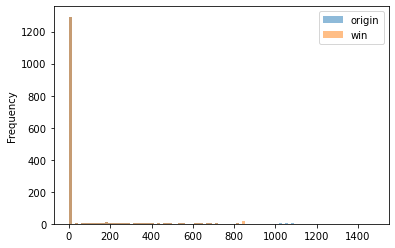

###
TotalBsmtSF
Outliers: 5
...Log-application not possible for ROI
...Winsorize column
[3206, 3094, 3200, 3138, 6110]


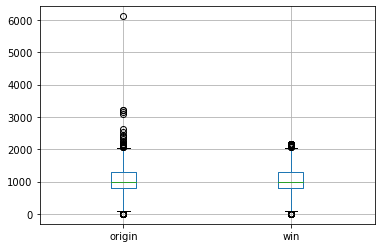

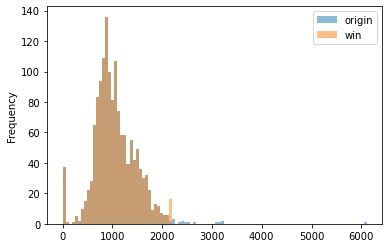

###
1stFlrSF
Outliers: 3
...Log-application not possible for ROI
...Winsorize column
[3228, 3138, 4692]


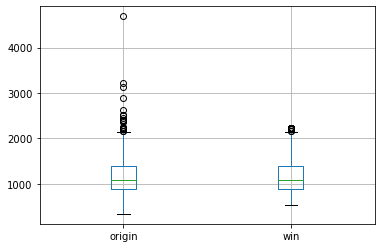

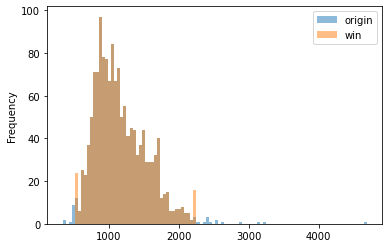

###
GrLivArea
Outliers: 4
...Log-application not possible for ROI
...Winsorize column
[4676, 4316, 4476, 5642]


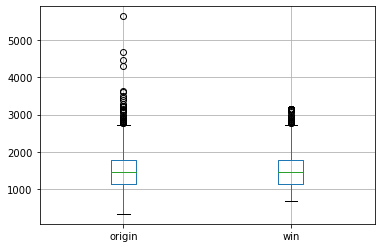

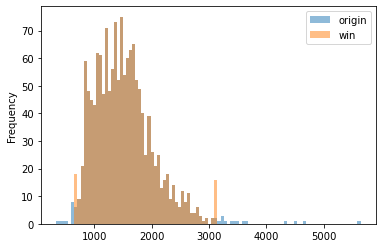

###
GarageArea
Outliers: 3
...Log-application not possible for ROI
...Winsorize column
[1390, 1356, 1418]


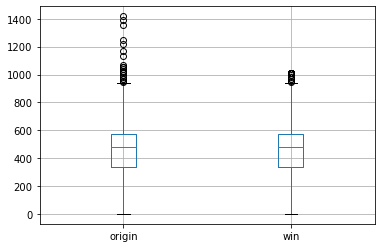

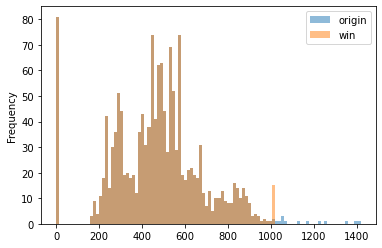

###
WoodDeckSF
Outliers: 3
...Log-application not possible for ROI
...Winsorize column
[857, 728, 736]


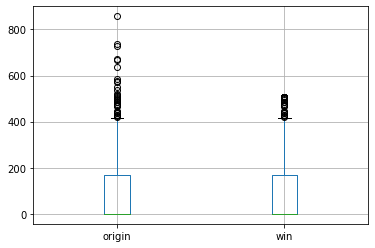

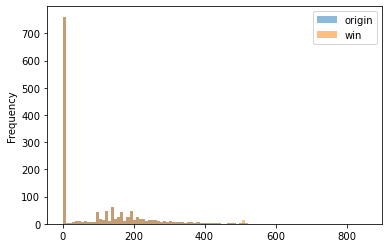

###
OpenPorchSF
Outliers: 18
...Log-application not possible for ROI
...Winsorize column
[523, 285, 406, 502, 274, 312, 288, 341, 291, 312, 418, 364, 282, 319, 304, 287, 292, 547]


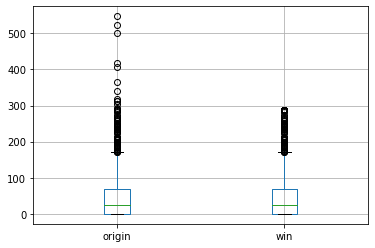

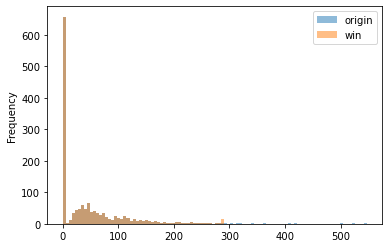

###
EnclosedPorch
Outliers: 208
...Log-application not possible for ROI
...Winsorize column
[272, 228, 205, 176, 205, 87, 172, 102, 37, 144, 64, 114, 202, 128, 156, 44, 77, 144, 192, 144, 140, 180, 228, 128, 183, 39, 184, 40, 552, 30, 126, 96, 60, 150, 120, 202, 77, 112, 252, 52, 224, 234, 144, 244, 268, 137, 24, 108, 294, 177, 218, 242, 91, 112, 160, 130, 184, 126, 169, 105, 34, 96, 248, 236, 120, 32, 80, 115, 291, 184, 116, 158, 112, 210, 36, 156, 144, 200, 84, 148, 116, 120, 136, 102, 240, 54, 112, 39, 100, 36, 189, 293, 164, 40, 216, 239, 112, 252, 240, 180, 67, 90, 120, 56, 112, 129, 40, 98, 143, 216, 234, 112, 112, 70, 386, 154, 185, 156, 156, 134, 196, 264, 185, 275, 96, 120, 112, 116, 230, 254, 68, 194, 192, 34, 150, 164, 112, 224, 32, 318, 244, 48, 94, 138, 108, 112, 226, 192, 174, 228, 19, 170, 220, 128, 80, 115, 137, 192, 252, 112, 96, 176, 216, 176, 214, 280, 96, 116, 102, 190, 236, 192, 84, 330, 208, 145, 259, 126, 264, 81, 164, 42, 123, 162, 100, 286, 190, 168, 20, 301, 1

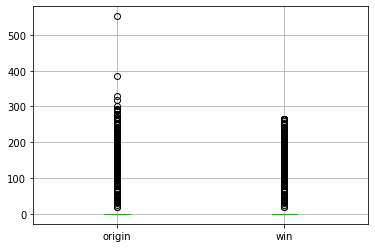

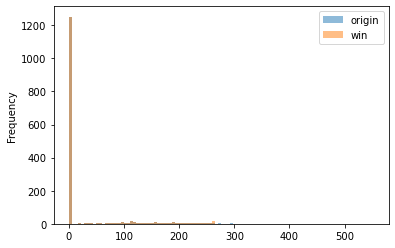

###
ScreenPorch
Outliers: 116
...Log-application not possible for ROI
...Winsorize column
[176, 198, 291, 252, 99, 184, 168, 130, 142, 192, 410, 224, 266, 170, 154, 153, 144, 142, 128, 259, 160, 198, 271, 234, 184, 374, 192, 185, 182, 90, 144, 224, 396, 170, 176, 140, 276, 192, 180, 161, 168, 145, 200, 122, 95, 144, 120, 60, 120, 126, 189, 260, 147, 385, 287, 200, 156, 100, 180, 216, 210, 197, 204, 192, 225, 192, 152, 175, 126, 312, 222, 265, 224, 322, 120, 190, 233, 63, 147, 180, 53, 143, 189, 189, 189, 192, 160, 160, 126, 100, 273, 180, 90, 288, 263, 224, 147, 120, 80, 163, 90, 288, 116, 259, 224, 216, 480, 120, 178, 440, 155, 168, 220, 119, 165, 40]


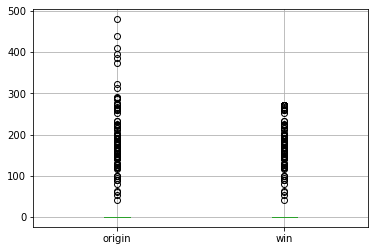

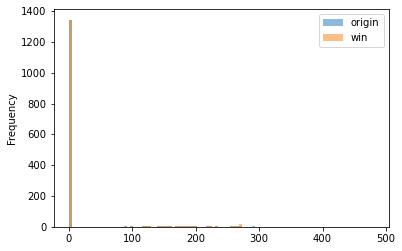

###
LotFrontage
Outliers: 12
...Log-application not possible for ROI
...Winsorize column
[195.0, 160.0, 150.0, 160.0, 195.0, 160.0, 155.0, 149.0, 200.0, 195.0, 200.0, 160.0]


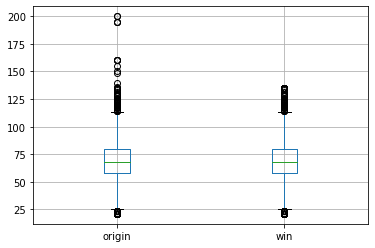

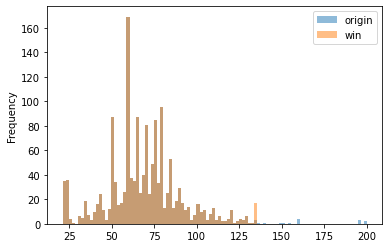

###
LotArea
Outliers: 19
...Log-application not possible for ROI
...Winsorize column
[26400, 31220, 47280, 24572, 47007, 26073, 56600, 51974, 41600, 23920, 39290, 25485, 43500, 33983, 27697, 39384, 33120, 50102, 31250]


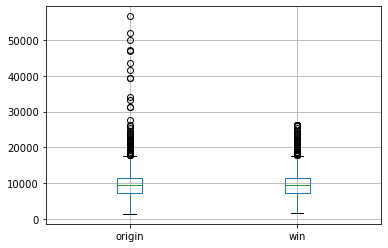

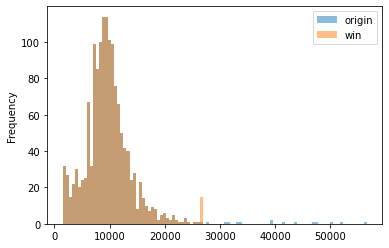

###
MasVnrArea
Outliers: 28
...Log-application not possible for ROI
...Winsorize column
[1095.0, 1159.0, 771.0, 726.0, 724.0, 730.0, 657.0, 680.0, 1110.0, 714.0, 1290.0, 1050.0, 668.0, 674.0, 710.0, 945.0, 970.0, 754.0, 1224.0, 1224.0, 886.0, 902.0, 662.0, 734.0, 674.0, 877.0, 738.0, 692.0]


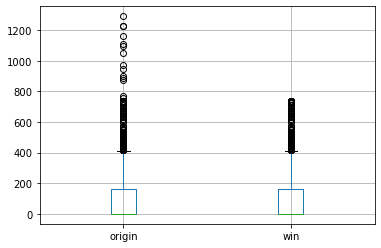

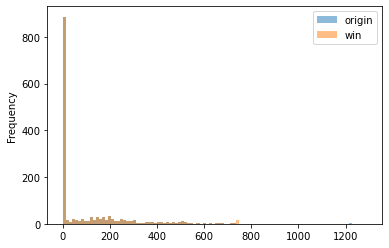

###
BsmtFinSF1
Outliers: 1
...Log-application not possible for ROI
...Winsorize column
[4010.0]


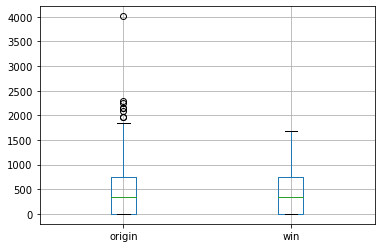

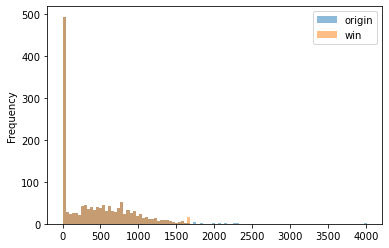

###
BsmtFinSF2
Outliers: 180
...Log-application not possible for ROI
...Winsorize column
[144.0, 78.0, 859.0, 981.0, 42.0, 46.0, 162.0, 174.0, 350.0, 263.0, 1073.0, 12.0, 159.0, 474.0, 453.0, 684.0, 387.0, 688.0, 252.0, 590.0, 284.0, 276.0, 168.0, 294.0, 622.0, 113.0, 1526.0, 360.0, 774.0, 364.0, 596.0, 884.0, 590.0, 92.0, 216.0, 136.0, 42.0, 147.0, 201.0, 512.0, 247.0, 202.0, 483.0, 750.0, 60.0, 102.0, 95.0, 63.0, 262.0, 393.0, 286.0, 450.0, 72.0, 243.0, 694.0, 875.0, 507.0, 435.0, 419.0, 250.0, 116.0, 624.0, 76.0, 270.0, 110.0, 288.0, 186.0, 449.0, 48.0, 613.0, 294.0, 495.0, 852.0, 555.0, 799.0, 811.0, 842.0, 670.0, 382.0, 294.0, 456.0, 308.0, 52.0, 196.0, 128.0, 488.0, 319.0, 273.0, 162.0, 240.0, 956.0, 723.0, 596.0, 162.0, 120.0, 679.0, 40.0, 60.0, 247.0, 121.0, 604.0, 153.0, 619.0, 6.0, 351.0, 1037.0, 829.0, 264.0, 38.0, 206.0, 167.0, 543.0, 259.0, 404.0, 138.0, 955.0, 691.0, 354.0, 66.0, 483.0, 154.0, 442.0, 448.0, 210.0, 227.0, 398.0, 127.0, 144.0, 722.0, 761.0, 288.0, 529.0, 43

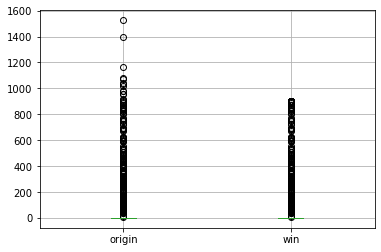

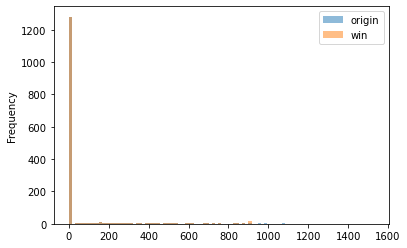

###
TotalBsmtSF
Outliers: 1
...Log-application not possible for ROI
...Winsorize column
[5095.0]


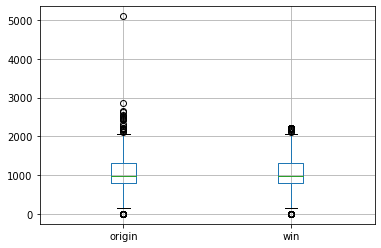

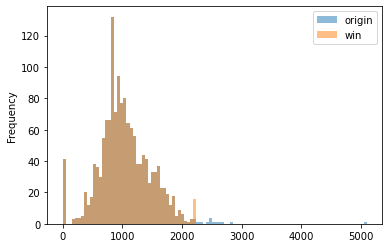

###
1stFlrSF
Outliers: 2
...Log-application not possible for ROI
...Winsorize column
[3820, 5095]


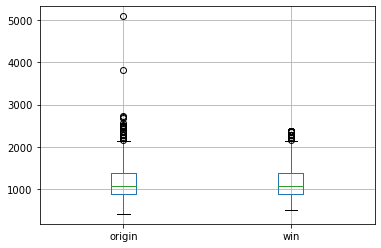

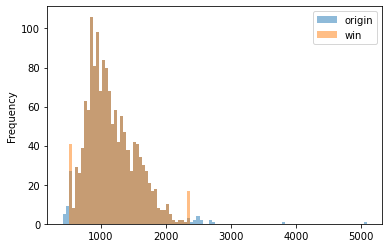

###
GrLivArea
Outliers: 3
...Log-application not possible for ROI
...Winsorize column
[3820, 5095, 3672]


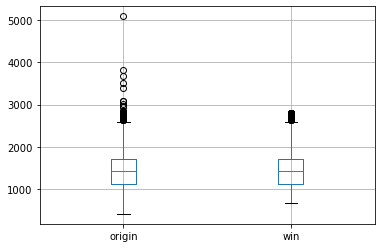

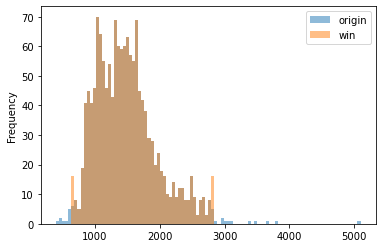

###
GarageYrBlt
Outliers: 1
...Log-application not possible for ROI
...Winsorize column
[2207.0]


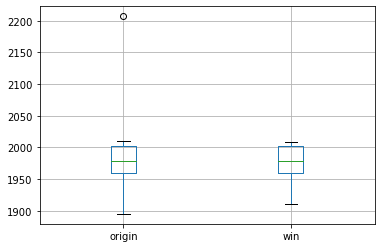

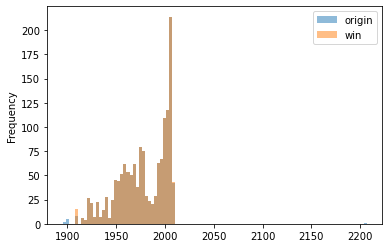

###
GarageArea
Outliers: 1
...Log-application not possible for ROI
...Winsorize column
[1488.0]


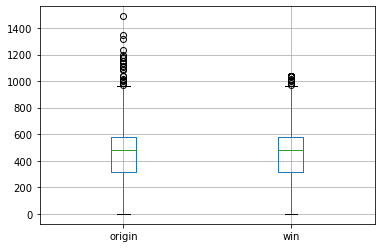

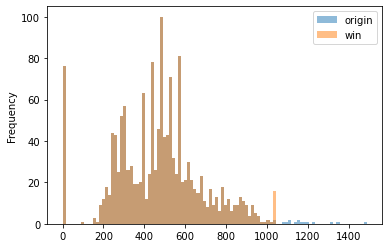

###
WoodDeckSF
Outliers: 4
...Log-application not possible for ROI
...Winsorize column
[1424, 690, 870, 684]


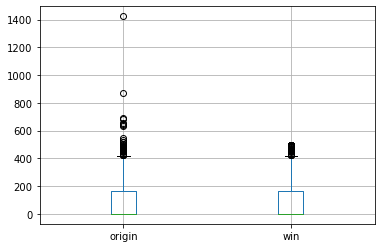

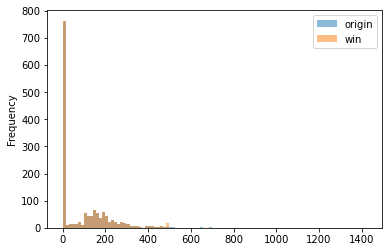

###
OpenPorchSF
Outliers: 14
...Log-application not possible for ROI
...Winsorize column
[312, 312, 304, 299, 365, 372, 368, 324, 570, 484, 742, 444, 382, 341]


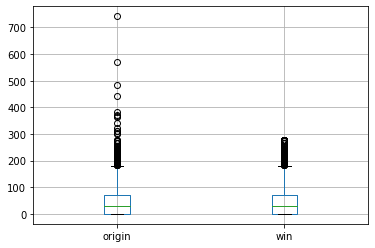

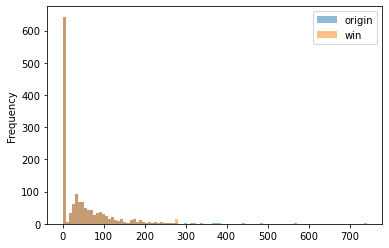

###
EnclosedPorch
Outliers: 251
...Log-application not possible for ROI
...Winsorize column
[80, 186, 120, 150, 205, 113, 135, 126, 334, 246, 18, 60, 41, 128, 35, 48, 32, 128, 364, 112, 248, 168, 45, 239, 60, 52, 56, 168, 36, 86, 265, 56, 64, 280, 222, 209, 218, 84, 264, 260, 203, 120, 140, 100, 134, 128, 168, 432, 112, 156, 42, 64, 40, 169, 176, 148, 244, 128, 25, 81, 160, 176, 238, 94, 98, 51, 34, 105, 150, 213, 112, 102, 148, 105, 288, 24, 100, 90, 144, 211, 55, 180, 150, 57, 81, 78, 72, 368, 154, 144, 180, 218, 165, 92, 16, 192, 40, 66, 96, 100, 144, 248, 109, 236, 126, 96, 30, 120, 60, 139, 219, 144, 48, 101, 180, 80, 55, 180, 84, 80, 117, 204, 122, 190, 231, 70, 280, 239, 138, 183, 90, 121, 41, 207, 224, 116, 96, 160, 192, 192, 246, 140, 192, 249, 36, 84, 290, 160, 116, 175, 20, 26, 40, 96, 160, 143, 150, 192, 136, 84, 96, 144, 70, 77, 77, 170, 88, 280, 140, 60, 68, 1012, 43, 35, 84, 196, 240, 64, 168, 116, 60, 120, 584, 216, 169, 30, 212, 96, 133, 42, 222, 40, 240, 168, 200, 186

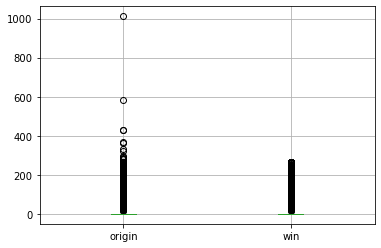

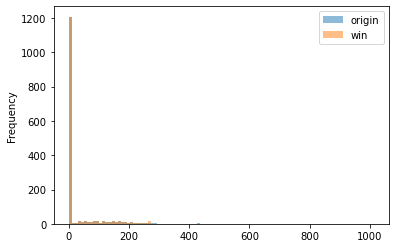

###
ScreenPorch
Outliers: 140
...Log-application not possible for ROI
...Winsorize column
[120, 144, 256, 216, 204, 160, 240, 148, 168, 266, 160, 166, 200, 155, 108, 200, 490, 168, 168, 156, 196, 121, 92, 288, 342, 255, 111, 112, 216, 231, 182, 160, 140, 110, 92, 168, 117, 195, 195, 115, 120, 120, 144, 141, 208, 192, 216, 144, 196, 94, 216, 192, 200, 164, 95, 256, 64, 576, 216, 255, 227, 161, 192, 100, 221, 100, 155, 171, 135, 322, 174, 175, 144, 182, 180, 144, 217, 200, 256, 161, 201, 192, 175, 168, 109, 156, 165, 225, 150, 216, 84, 126, 168, 144, 144, 116, 100, 153, 228, 144, 153, 145, 138, 108, 240, 88, 280, 115, 144, 123, 225, 156, 210, 224, 110, 264, 270, 120, 142, 288, 195, 112, 144, 227, 162, 115, 225, 210, 180, 200, 180, 348, 168, 112, 113, 104, 192, 153, 155, 138]


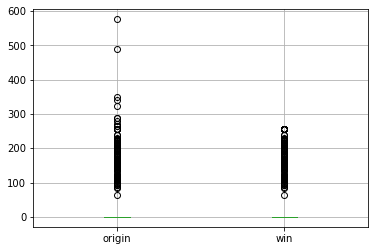

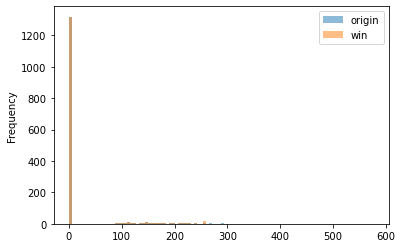

###
MiscVal
Outliers: 51
...Log-application not possible for ROI
...Winsorize column
[12500, 500, 1500, 300, 450, 500, 80, 600, 490, 1200, 650, 450, 400, 600, 900, 1500, 2500, 700, 750, 2000, 400, 650, 450, 1500, 450, 6500, 400, 1000, 600, 4500, 3000, 400, 500, 2000, 400, 2000, 400, 500, 450, 17000, 1512, 3000, 455, 460, 650, 400, 4500, 600, 500, 420, 700]


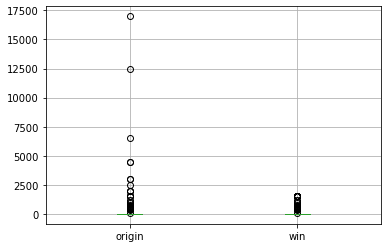

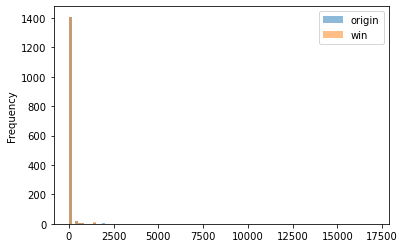

###


In [14]:
# outlier detection and rescaling and export
import scipy.stats.mstats as ssm
import matplotlib.pyplot as plt
k = 3
kl = np.amax(keyLength)
print(f'Max object key length: {kl}')
xset = []

for i, d in enumerate(data2):
    
    try:
        X = d.drop(['SalePrice','Id'], axis =1)
    except:
        X = d.drop('Id', axis =1)
        
    for col in X.columns:

        xslice = X[col].copy()

        if len(xslice.unique()) > kl:

            q1 = xslice.quantile(0.25)
            q2 = xslice.quantile(0.75)
            iqr = q2 - q1
            lower = q1 - k*iqr 
            upper = q2 + k*iqr 

            outliers = [xs for xs in xslice if (xs < lower or xs > upper)]
            lo = len(outliers)
            if lo > 0:
                print(col)
                print(f'Outliers: {lo}')
                #check if log good option

                print('...Log-application not possible for ROI')
                print('...Winsorize column')

                wslice = ssm.winsorize(xslice, (0.01, 0.01))
                d = {'origin': xslice.to_numpy(), 'win': wslice}
                print(outliers)

                df = pd.DataFrame(data=d)
                df.boxplot()
                plt.show()

                df.plot.hist(bins = 100, alpha=0.5)
                plt.show()

                X[col] = wslice

                print('###')
                
    xset.append(X)
            
# rescale and export
name = ['train_MinMaxScaledCleanedOutlier','test_MinMaxScaledCleanedOutlier']
for i, X in enumerate(xset):
    scaler = MinMaxScaler()
    scaler.fit(X.to_numpy())
    df = scaler.transform(X.to_numpy())
    df = pd.DataFrame(df, columns = list(X.columns))
    
    df.to_csv(op.join(path,name[i]))

In [15]:
# robust rescale and export
from sklearn.preprocessing import RobustScaler
name = ['train_RobustScaledClean','test_RobustScaledClean']
for i, d in enumerate(data2):
    try:
        X = d.drop(['SalePrice','Id'], axis =1)
    except:
        X = d.drop('Id', axis =1)
    scaler = RobustScaler()
    scaler.fit(X.to_numpy())
    df = scaler.transform(X.to_numpy())
    df = pd.DataFrame(df, columns = list(X.columns))
    
    df.to_csv(op.join(path,name[i]))